


OneBank launched a program to encourage its existing customers to borrow via a consumer loan program. The data are available in file bank.csv. The bank wants to develop a model to predict which customers have the greatest probability of accepting the loan given the data from a previous promotion campaign, to reduce promotion costs and send the offer only to a subset of its customers.




---
---
#**Importing Required Moduless**
---
---


In [2]:
# Importing Required modules >>

# Import numpy for numerical computations
import numpy as np
# Import pandas for data manipulation and analysis
import pandas as pd
# Import matplotlib for data visualization
import matplotlib.pyplot as plt
# Import warnings to suppress unwanted warning messages
import warnings
warnings.filterwarnings('ignore')
# Import seaborn for statistical plotting and better visualizations
import seaborn as sns

We begin by importing essential Python libraries that support data loading, manipulation, visualization, and analysis:

- **NumPy** (`np`): Used for efficient numerical computations, especially with arrays and mathematical operations.
- **Pandas** (`pd`): Provides powerful data structures like `DataFrame` for data manipulation and analysis.
- **Matplotlib** (`plt`): A core plotting library for creating static, animated, and interactive visualizations.
- **Seaborn** (`sns`): Built on top of Matplotlib, Seaborn offers enhanced statistical plots with better aesthetics.
- **Warnings**: Suppresses unnecessary warnings to keep the output clean and readable.

---
---
#**Loading Dataset**
---
---


In [3]:
# Loading dataset into df variable with the help of Pandas dataframe
df = pd.read_csv('./bank.csv')

In [4]:
# Explore the dataset take a look at top 5 rows using head function
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Explore the dataset take a look at bottom 5 rows using tail function >>
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


We loaded the banking dataset using **Pandas** and store it in the variable df. This dataset contains information about bank customers, including demographic and financial details such as:

- Age, Experience, Income
- Family size, Education level
- Mortgage, CreditCard, Online usage
- Whether the customer has a **Personal Loan**, **CD Account**, or **Securities Account**

The `head()` and `tail()` function is used to display the first five and last 5 rows of the dataset, helping us get a quick overview of the structure and types of data available.

In [6]:
# Check the shape of dataset i.e No of Rows and No of Columns
print("[$] No of rows in dataset >> ",df.shape[0])
print("[$] No of columns in dataset >> ",df.shape[1])

[$] No of rows in dataset >>  5000
[$] No of columns in dataset >>  14


In [7]:
# Check for Null values in dataset
print("[$] No of null values in dataset >> ",df.isnull().sum().sum())
# Check for Duplicate Values in dataset
print("[$] Duplicate Values in dataset >> ",df.duplicated().sum())

[$] No of null values in dataset >>  0
[$] Duplicate Values in dataset >>  0


In [8]:
# Information of dataset with datatypes and non values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


---
---
###**Dataset Overview and Integrity Check**
---
---

After loading the dataset, we performed a basic data quality check:

- **Number of Rows:** 5000  
- **Number of Columns:** 14  
- **Null Values:** *None* - the dataset is clean with no missing values.  
- **Duplicate Records:** *None* - all rows are unique.  

Using `df.info()`, we confirmed that:
- Most columns are of type int64, except CCAvg which is float64.
- The dataset contains both **numerical** and **categorical-like** features (e.g., Family, Education, Online).
- Columns like ID and ZIP Code are likely identifiers and may not contribute to predictive modeling.

This confirms that the dataset is well-structured and ready for preprocessing and analysis.

---
---
#**EDA**
---
---

In [9]:
# Statistiacl description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- `ID` - Just an identifier. No predictive power. Should be dropped.
- `Age` - Age varies from 23 to 67 years (mean ~45). Reasonable spread for a bank's customer base.
- `Experience` - Should align with age, but **negative experience values (-3)** suggest **data issues**. We'll fix that later.
- `Income` - Highly variable — ranges from \$8k to \$224k per year. May need **log transformation** for models that care about skew.
- `ZIP Code` - Not useful unless geospatial modeling is needed. Here, probably **drop**.
- `Family` - Number of family members: 1–4. Categorical / ordinal.
- `CCAvg` - Average credit card spending per month. Skewed right (Max 10.0 vs Mean 1.93).
- `Education` - 1, 2, or 3. Probably levels like 'Undergrad', 'Graduate', 'Advanced/PhD'. Treated as categorical. -
- `Mortgage` - Highly skewed (mean = 56, but max = 635). A lot of zeros (probably no mortgage).
- `Personal Loan` - Our **target variable** — 9.6% acceptance rate. **Imbalanced** dataset (mostly "No Loan").
- `Securities Account`, `CD Account`, `Online`, `CreditCard` - Binary indicators (0/1).

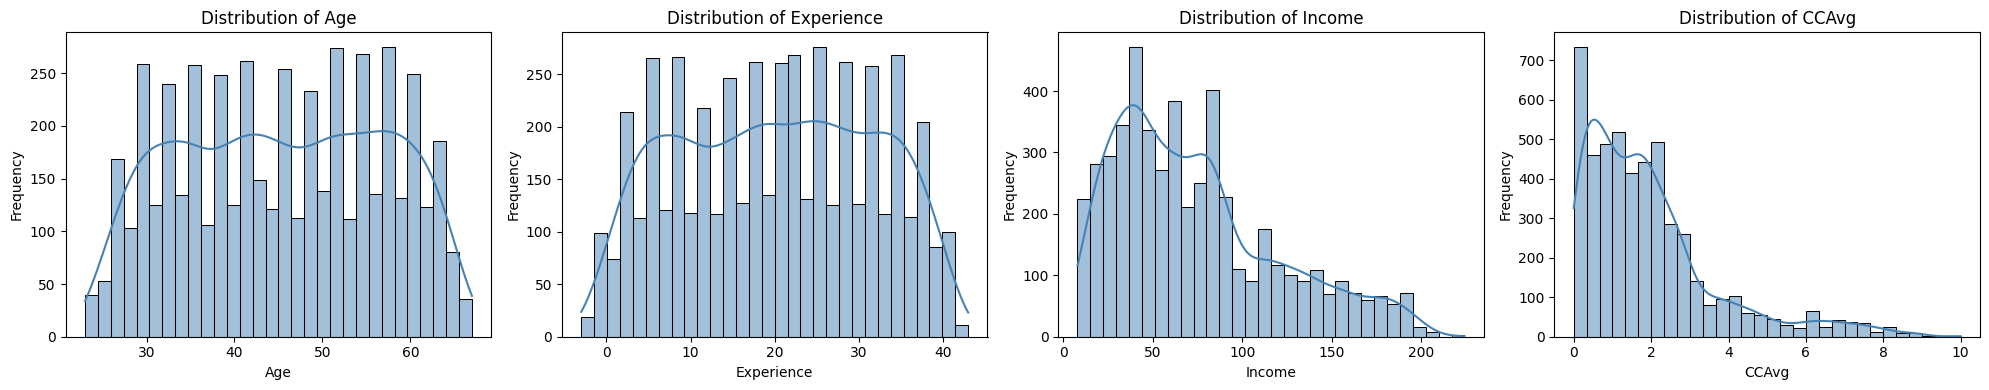

In [10]:
# Select only numerical columns (excluding target variable 'loan')
num_cols = ['Age','Experience','Income','CCAvg']

# Set up the grid
n_cols = 4  # Number of plots per row
n_rows =1

plt.figure(figsize=(n_cols*5, n_rows*4))

for idx, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- **Age**: The age of customers appears to be fairly evenly distributed between 25 and 65, indicating the bank serves a wide adult demographic with no strong age concentration.
- **Experience**: Similar to age, experience is uniformly spread across values, though slightly skewed toward mid-range values. Some customers may even have negative experience values, suggesting possible data errors or fresh graduates.
- **Income**: Income shows a right-skewed distribution, with most customers earning below 100k. A few high-income outliers are visible, which may influence average values and require normalization or transformation in modeling.
- **CCAvg (Credit Card Average Spending)**: Heavily right-skewed distribution - most customers spend less than 2k on credit cards monthly, while a few spend significantly more. This could indicate potential high-value customers.


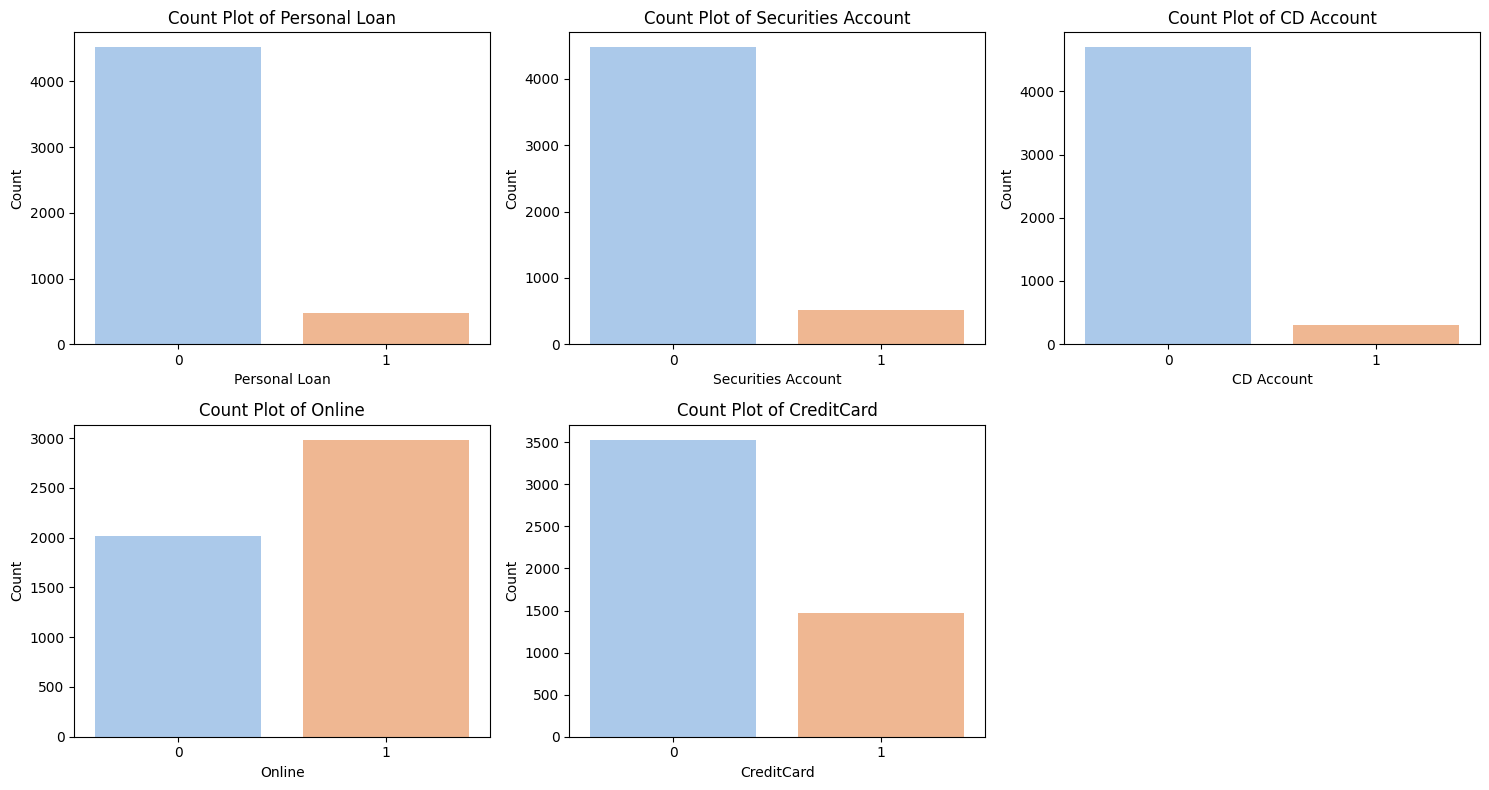

In [11]:
# List of binary columns (0-1 columns)
binary_cols = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

# Setup grid
n_cols = 3
n_rows = (len(binary_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols*5, n_rows*4))

# Countplots for binary columns
for idx, col in enumerate(binary_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

- **Personal Loan**: Only **~9.6%** (480/5000) of customers have taken a personal loan, indicating a highly imbalanced target variable. Class imbalance should be addressed during modeling.
- **Securities Account**: About **10.4%** of customers have a securities account. This feature might signal more investment-savvy clients.
- **CD Account**: Even fewer customers (~6%) hold CD accounts, again suggesting a skew in customer preferences or needs.
- **Online Banking**: About **60%** use online services, showing digital banking is more common than traditional-only usage.
- **Credit Card**: Around **29.4%** have a credit card with the bank, which could reflect customer trust, creditworthiness, or targeted services.

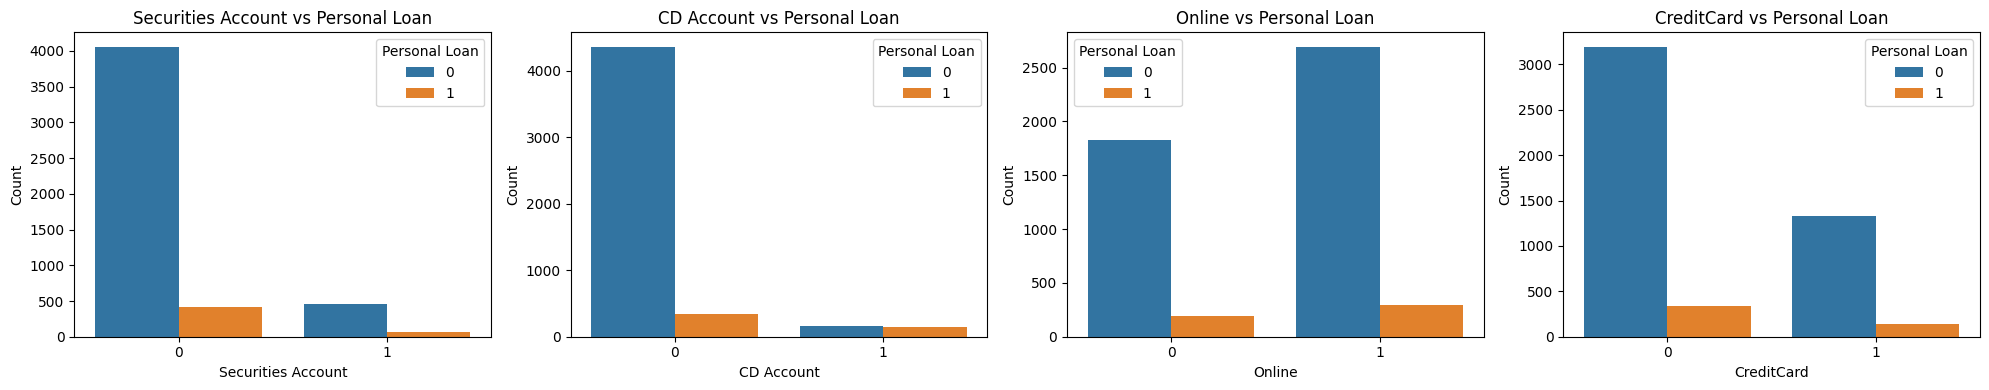

In [12]:
# Define categorical binary features
categorical_features = ['Securities Account', 'CD Account', 'Online', 'CreditCard']

# Set figure size for all 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

# Create countplots in each subplot
for i, col in enumerate(categorical_features):
    sns.countplot(ax=axes[i], x=col, hue='Personal Loan', data=df)
    axes[i].set_title(f'{col} vs Personal Loan')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Personal Loan')

plt.tight_layout()
plt.show()

1. **Securities Account**:
   - Majority of customers, regardless of loan status, **do not have a securities account**.
   - However, those with securities accounts have a slightly higher proportion of loan acceptance.

2. **CD Account**:
   - There is a **strong correlation** between having a CD account and accepting a personal loan.
   - A **higher proportion of CD account holders** have taken loans, making this a **potentially influential feature**.

3. **Online Banking**:
   - While more people overall use online banking, the proportion of loan takers is **slightly higher among online banking users**.
   - This could imply that digital users are more likely to explore or accept financial products like loans.

4. **Credit Card Ownership**:
   - Loan acceptance is **more common among customers who own a credit card**.
   - This indicates a possible relationship between **credit activity and personal loan acceptance**.

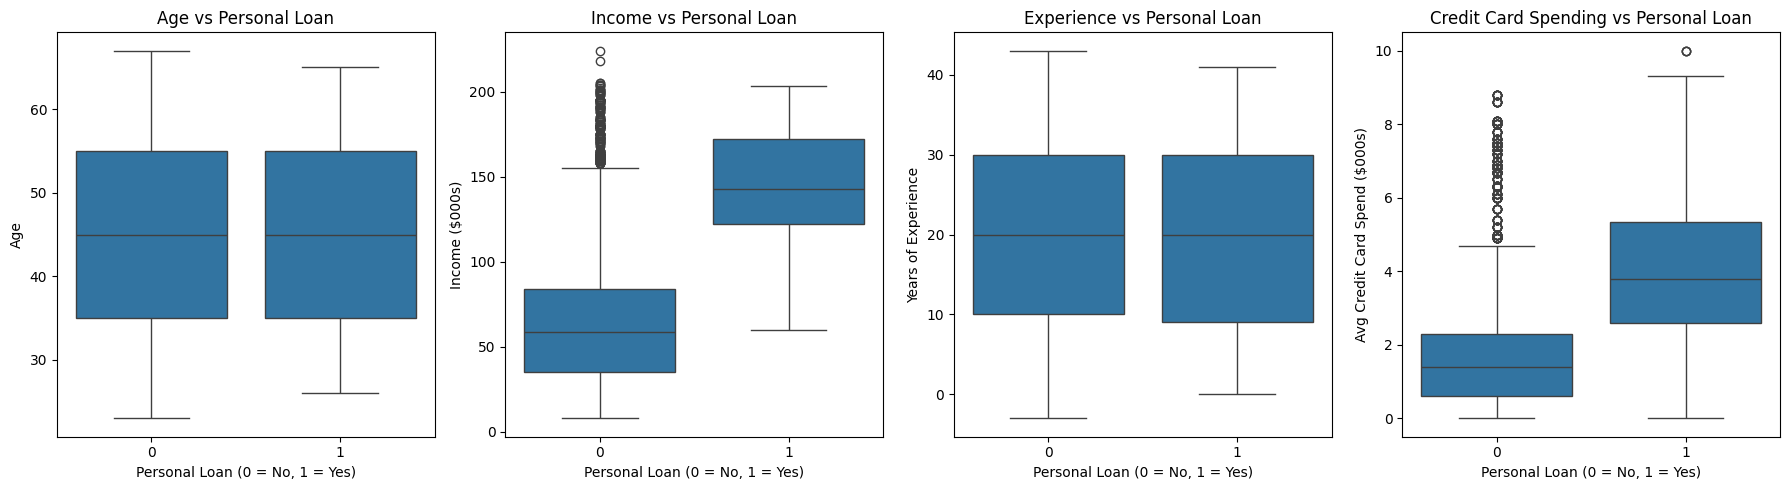

In [13]:
# Define features for boxplots
numerical_features = ['Age', 'Income', 'Experience', 'CCAvg']
titles = ['Age vs Personal Loan', 'Income vs Personal Loan','Experience vs Personal Loan', 'Credit Card Spending vs Personal Loan']
ylabels = ['Age', 'Income ($000s)', 'Years of Experience', 'Avg Credit Card Spend ($000s)']

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Plot each feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(ax=axes[i], x='Personal Loan', y=feature, data=df)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Personal Loan (0 = No, 1 = Yes)')
    axes[i].set_ylabel(ylabels[i])

plt.tight_layout()
plt.show()

1. **Age vs Personal Loan**:
   - The distribution of age is fairly similar for both loan applicants and non-applicants.
   - No major difference in median age between the two groups, indicating **age may not be a strong factor** in loan decisions.

2. **Income vs Personal Loan**:
   - Customers who accepted a personal loan tend to have **significantly higher income**.
   - The median income for loan takers is much higher than for non-loan customers.
   - This suggests **income is a key factor** in determining personal loan eligibility or acceptance.

3. **Experience vs Personal Loan**:
   - Both groups have similar distributions of experience.
   - The slight difference in medians suggests **experience has minimal influence** on loan decisions.

4. **CCAvg vs Personal Loan (Credit Card Spend)**:
   - Loan applicants tend to have **higher average credit card spending**.
   - This may indicate that **customers with higher spending behavior** are more likely to apply for or be offered personal loans.

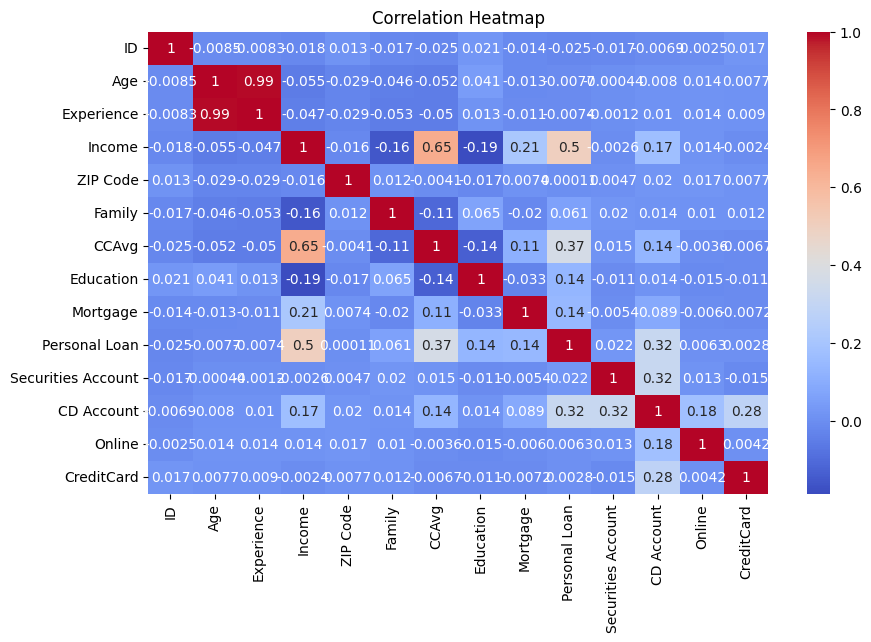

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

###**Strong Correlations (correlation ≥ 0.5)**

- **Age and Experience**: `correlation = 0.99`
  - Very strong positive correlation.
  - Likely redundant features; including both in the model might introduce multicollinearity.

- **Income and CCAvg**: `correlation = 0.65`
  - Moderate-to-strong positive correlation.
  - Higher income individuals tend to have higher average credit card spending.
  - Important variables for financial behavior modeling.

- **Income and Personal Loan**: `correlation = 0.50`
  - Positive correlation indicates that people with higher income are more likely to take personal loans.
  - This is logical as banks are more likely to approve loans for high-income individuals.

<br/>

### **Moderate Correlations (0.3 ≤ correlation < 0.5)**

- **CD Account with**:
  - **Income**: `0.32`
  - **Personal Loan**: `0.32`
  - These suggest that customers with CD accounts are more likely to have higher income, hold credit cards, and take personal loans.

- **CCAvg and Personal Loan**: `0.37`
  - Indicates that customers who spend more on credit cards are also more likely to take personal loans-potential sign of more financial activity or need.

<br/>

###**Weak Correlations (correlation < 0.3)**

- Most other features show **very weak or no linear relationship** with one another.
- Examples:
  - **ZIP Code** is uncorrelated with most variables — as expected, since it’s likely just a location identifier.
  - **Online**, **Securities Account**, and **CreditCard** have very weak correlations with other variables - indicating more independence.


<br/>

- Age ↔ Experience        - 0.99        - Highly redundant
- Income ↔ CCAvg          - 0.65        - High earners spend more
- Income ↔ Personal Loan  - 0.50        - Income impacts loan approval
- CCAvg ↔ Personal Loan   - 0.37        - Credit spending linked to loans
- CD Account ↔ Income     - 0.32        - Higher income = more CD accounts
- CD Account ↔ Personal Loan - 0.32     - CD account holders may also use loans


---
---
#**Data Processing**
---
---

In [15]:
# Renaming the 'Personal Loan' column to 'loan' for better clarity
df.rename(columns={'Personal Loan': 'loan'}, inplace=True)

# Droping the irrelevant columns 'ID' and 'ZIP Code' from the dataframe to clean up the dataset
df = df.drop(['ID', 'ZIP Code'], axis=1)

# Fixing the 'Experience' column by setting any negative values to 0
df['Experience'] = df['Experience'].apply(lambda x: 0 if x < 0 else x)

Before building predictive models, it's essential to clean and prepare the dataset to ensure quality, interpretability, and performance.

1. **Renaming for Clarity:**
   - The target variable **'Personal Loan'** was renamed to **'loan'** to simplify referencing and improve code readability.
   - Clear naming conventions are important when dealing with complex models and multiple iterations.

2. **Removing Irrelevant Features:**
   - The columns **'ID'** and **'ZIP Code'** were removed:
     - **ID** is a unique identifier that doesn’t carry predictive information.
     - **ZIP Code** may reflect geographic location but is too granular and can introduce noise or lead to overfitting in some models. Unless we perform geographic clustering, it's generally excluded.

3. **Handling Invalid Data in Experience:**
   - The **'Experience'** column was found to contain negative values, which are logically inconsistent (a person cannot have negative years of experience).
   - To correct this, all negative values were set to **0**, assuming either a data entry error or missing information.

---
---
#**Importing ML modules**
---
---

In [16]:
# Importing the train_test_split function from sklearn to split data into training and test sets
from sklearn.model_selection import train_test_split
# Importing StandardScaler for standardizing features (scaling them to a standard range)
from sklearn.preprocessing import StandardScaler
# Importing Gaussian Naive Bayes classifier for probabilistic classification based on Bayes' theorem
from sklearn.naive_bayes import GaussianNB
# Importing BaggingClassifier for ensemble learning, combining multiple models to improve performance
from sklearn.ensemble import BaggingClassifier
# Importing DecisionTreeClassifier to build decision tree models for classification
from sklearn.tree import DecisionTreeClassifier
# Importing LogisticRegression for binary or multi-class classification based on logistic function
from sklearn.linear_model import LogisticRegression
# Importing metrics to evaluate model performance, including confusion matrix and accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

To build, evaluate, and improve machine learning models, we imported a suite of tools from the **scikit-learn** library:

- **Data Splitting and Preprocessing:**
  - **train_test_split**: Divides the dataset into training and validation sets, allowing us to evaluate how well the model generalizes to unseen data.
  - **StandardScaler**: Standardizes numerical features (mean = 0, std = 1), which is especially important for algorithms like **Logistic Regression** and **Naïve Bayes** that are sensitive to feature scale.

- **Machine Learning Models:**
  - **GaussianNB**: Implements the Gaussian Naïve Bayes algorithm, a fast and probabilistic classifier that assumes normal distribution of features.
  - **LogisticRegression**: A linear model that estimates the probability of a binary outcome using the logistic (sigmoid) function.
  - **DecisionTreeClassifier**: Builds decision trees by learning simple decision rules from features. Works well for capturing non-linear relationships.
  - **BaggingClassifier**: An ensemble technique that builds multiple base models (e.g., decision trees) and aggregates their predictions for improved accuracy and reduced overfitting.

- **Model Evaluation:**
  - **confusion_matrix**: Provides a matrix that describes the performance of a classification model by comparing actual vs. predicted labels.
  - **accuracy_score**: Measures the proportion of correctly classified observations.


---
---
#**Dataset Splitting**
---
---

In [17]:
# Define the feature set (X) by dropping the 'loan' column from the dataframe
X = df.drop('loan', axis=1)

# Define the target variable (y) as the 'loan' column This is the column we are trying to predict
y = df['loan']

# Perform the train-test split, dividing the data into training and validation sets
# - X_train and y_train will be used for training the model
# - X_valid and y_valid will be used for validating the model's performance
# Test size is set to 30% of the data, with 70% used for training |  'random_state=42' ensures reproducibility of the results | 'stratify=y' ensures that the target variable is evenly distributed across both sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

To build a predictive model, we separated dataset into two components:

- **Feature Set (**X**)**: These are the independent variables that will be used by the model to learn patterns. In this case, all columns except the **'loan'** column are considered features.
- **Target Variable (**y**)**: This is the dependent variable the model aims to predict. Here, the **'loan'** column indicates whether a customer accepted the personal loan offer (**1**) or not (**0**).
- Once the features and target are defined, the dataset is split into training and validation subsets to assess model performance fairly. This is a critical step in avoiding overfitting and ensuring the model generalizes well to unseen data.
- **Training Set (70%)**: This portion is used to train the machine learning models.
- **Validation Set (30%)**: Held back to test how well the model performs on new, unseen data.

We applied following configurations during the split:

- **random_state=42**: Ensures consistent and reproducible results across runs by controlling randomness.
- **stratify=y**: Preserves the distribution of the target classes (**loan = 0** and **loan = 1**) across both training and validation sets. This is especially important in imbalanced datasets, as it ensures both sets represent the true distribution of the data.
- This strategic split allows us to evaluate the model’s ability to generalize before deploying it or testing it on truly unseen data.

In [18]:
# Initialize the StandardScaler object to standardize the feature values Standardization is crucial for models like Logistic Regression and Naive Bayes that are sensitive to the scale of the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform it, This calculates the mean and standard deviation of the training data and then scales it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation (scaling) to the validation data, We use the already fitted scaler to ensure the validation data is scaled with the same mean and standard deviation as the training data
X_valid_scaled = scaler.transform(X_valid)

Before training certain machine learning models, especially **Logistic Regression** and **Naïve Bayes**, it is essential to standardize the feature values. Standardization ensures that each feature contributes equally to the model’s learning process, preventing models from being biased toward features with larger scales.

####**Why Standardization is Important:**
- **Logistic Regression** relies on gradient-based optimization. If the features are not scaled, convergence may be slow or unstable.
- **Gaussian Naïve Bayes** assumes features follow a normal distribution. Standardized features make this assumption more realistic.
- Models like **Decision Trees** or **Bagging Classifiers** are generally **scale-invariant** and do **not** require standardization.

####**How Standardization Works:**
Standardization (Z-score normalization) transforms the features such that:
- The **mean** of each feature becomes `0`
- The **standard deviation** becomes `1`

We applied this transformation in two steps:
1. **Fitting and Transforming the Training Data**: The scaler computes the mean and standard deviation **from the training set** and scales the features accordingly.
2. **Transforming the Validation Data**: The same mean and standard deviation values (learned from the training set) are used to scale the validation set. This prevents **data leakage** and ensures fair evaluation.


---
---
#**Model Building**
---
---

In [19]:
# Model 1: Naive Bayes
# Initialize the Naive Bayes classifier (GaussianNB is used for continuous features)
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_pred = nb_model.predict(X_valid_scaled)
# Predict the probabilities for each class and select the probability of the positive class (loan=1)
# This will give us the probability of the 'loan' being granted (1)
nb_prob = nb_model.predict_proba(X_valid_scaled)[:,1]

###**Model 1: Naive Bayes**
The **Naive Bayes** classifier is chosen because of its simplicity and effectiveness, especially when the features are conditionally independent given the class. This assumption works well for certain problems like text classification and can be applied here if the features (like financial data) are roughly independent given the target (loan approval). The Gaussian variant of Naive Bayes is specifically used when the features are continuous and assumed to follow a normal (Gaussian) distribution.

- **Initialization**: We initialize the **GaussianNB** model, which is suitable for datasets with continuous features.
- **Training**: The model is trained on the scaled training data (**X_train_scaled**) and the corresponding target labels (**y_train**).
- **Prediction**: We use the model to predict the class labels for the validation set (**X_valid_scaled**), and also predict the probabilities of each class to calculate the likelihood of a loan being granted (i.e., the probability of class 1).

In [20]:
# Model 2: Logistic Regression
# Initialize the Logistic Regression model with a fixed random state for reproducibility
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_valid_scaled)
# Predict the probabilities for each class and select the probability of the positive class (loan=1)
# This will give us the probability of the 'loan' being granted (1)
lr_prob = lr_model.predict_proba(X_valid_scaled)[:,1]

###**Model 2: Logistic Regression**
**Logistic Regression** is selected for this task due to its ability to model binary outcomes effectively. It is particularly useful when the goal is to estimate the probability of a binary event, like the likelihood of a loan being granted. Unlike Naive Bayes, which assumes independence, Logistic Regression models the relationship between the input features and the probability of the target class using a logistic function.

- **Initialization**: We initialize the **LogisticRegression** model and set a fixed **random_state** for reproducibility.
- **Training**: The model is trained on the scaled training data to learn the relationship between the features and the target labels.
- **Prediction**: Similar to Naive Bayes, we predict the class labels for the validation set, and also calculate the probabilities of each class to assess the likelihood of the loan being granted.


In [21]:
# Model 3: Bagging with Decision Tree
# Initialize the BaggingClassifier with a DecisionTreeClassifier as the base estimator
# Bagging (Bootstrap Aggregating) uses multiple models to reduce variance and overfitting
bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1),n_estimators=100,random_state=1)
# Trees don't require scaling
bag_model.fit(X_train, y_train)
bag_pred = bag_model.predict(X_valid)

###**Model 3: Bagging with Decision Tree**
**Bagging (Bootstrap Aggregating)** is used here to improve the performance of a Decision Tree model by reducing its variance. Decision Trees are prone to overfitting, especially when they are deep or complex. By aggregating multiple Decision Trees trained on random subsets of the data, Bagging helps to reduce overfitting and provides a more robust and stable model.

- **Initialization**: We initialize the **BaggingClassifier** with a **DecisionTreeClassifier** as the base estimator. This means that multiple Decision Trees will be trained on different bootstrapped datasets (random samples with replacement).
- **Training**: The model is trained using the training data (**X_train**) without the need for scaling, as Decision Trees are not sensitive to the scale of the features.
- **Prediction**: The model predicts the class labels for the validation set and calculates the probabilities of the positive class (loan being granted). By aggregating the predictions of all individual trees, Bagging reduces the variance of the decision process.


In [22]:
# Predict the probabilities for each class and select the probability of the positive class (loan=1)
# This will give us the probability of the 'loan' being granted (1)
bag_prob = bag_model.predict_proba(X_valid)[:, 1]

---
---
#**Model Evaluation**
---
---

In [31]:
# The confusion matrix evaluates the performance of the model by comparing predicted labels to actual labels. It provides the counts of true positives, false positives, true negatives, and false negatives

# Evaluate Naive Bayes model
nb_acc = accuracy_score(y_valid, nb_pred)
nb_err = 1 - nb_acc
print("Naive Bayes Accuracy: {:.2f}".format(nb_acc))
print("Naive Bayes Error Rate: {:.2f}".format(nb_err))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_valid, nb_pred))

# Evaluate Logistic Regression model
lr_acc = accuracy_score(y_valid, lr_pred)
lr_err = 1 - lr_acc
print("\nLogistic Regression Accuracy: {:.2f}".format(lr_acc))
print("Logistic Regression Error Rate: {:.2f}".format(lr_err))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_valid, lr_pred))

# Evaluate Bagging model
bag_acc = accuracy_score(y_valid, bag_pred)
bag_err = 1 - bag_acc
print("\nBagging Accuracy: {:.2f}".format(bag_acc))
print("Bagging Error Rate: {:.2f}".format(bag_err))
print("Bagging Confusion Matrix:\n", confusion_matrix(y_valid, bag_pred))

# Create a DataFrame to store actual and predicted values along with predicted probabilities
results = pd.DataFrame({
    'Actual': y_valid.values,
    'NaiveBayes_Pred': nb_pred,
    'LogReg_Pred': lr_pred,
    'Bagging_Pred': bag_pred,
    'NaiveBayes_Prob': nb_prob,
    'LogReg_Prob': lr_prob,
    'Bagging_Prob': bag_prob
})

Naive Bayes Accuracy: 0.88
Naive Bayes Error Rate: 0.12
Naive Bayes Confusion Matrix:
 [[1238  118]
 [  62   82]]

Logistic Regression Accuracy: 0.95
Logistic Regression Error Rate: 0.05
Logistic Regression Confusion Matrix:
 [[1337   19]
 [  51   93]]

Bagging Accuracy: 0.99
Bagging Error Rate: 0.01
Bagging Confusion Matrix:
 [[1350    6]
 [   9  135]]


###**Model Performance Evaluation**

To assess the performance of each individual model, we analyzed their confusion matrices, accuracy, and error rates. Here's a summary of the observations:

**Naive Bayes:**
- **Accuracy:** 0.88, **Error Rate:** 0.12  
- The model correctly classified most instances, but it had relatively high false positives (118) and false negatives (62), which indicates some difficulty in separating the classes.
- Being a simple probabilistic model, it assumes feature independence, which may not hold true in this dataset—contributing to its lower performance.

**Logistic Regression:**
- **Accuracy:** 0.95, **Error Rate:** 0.05  
- Logistic Regression significantly improves upon Naive Bayes with fewer misclassifications.
- False positives (19) and false negatives (51) are both reduced, showing that the model handles class boundaries more effectively.

**Bagging with Decision Tree:**
- **Accuracy:** 0.99, **Error Rate:** 0.01  
- This model outperforms both Naive Bayes and Logistic Regression with extremely high accuracy.
- It has the lowest number of false predictions (only 15 in total: 6 FP, 9 FN), which reflects its strength in reducing variance and capturing complex patterns using an ensemble of trees.

**Conclusion:**
- Among the three, **Bagging** is the most accurate and reliable model for this classification task.
- **Naive Bayes**, while fast and interpretable, may not be suitable for datasets with correlated features.
- **Logistic Regression** strikes a balance between simplicity and performance and performs well in linearly separable spaces.


In [32]:
# Ensemble Predictions
# Majority Vote: A majority vote is taken from the predictions of all three models if at least two models predict a positive outcome (loan=1), then the ensemble prediction is 1.
results['Majority_Vote'] = (results[['NaiveBayes_Pred', 'LogReg_Pred', 'Bagging_Pred']].sum(axis=1) >= 2).astype(int)

# Average Probability: The average probability of each model for the positive class (loan=1) is calculated. The final prediction is 1 if the average probability is greater than or equal to 0.5, else it's 0.
results['Avg_Prob'] = results[['NaiveBayes_Prob', 'LogReg_Prob', 'Bagging_Prob']].mean(axis=1)
results['Avg_Prob_Pred'] = (results['Avg_Prob'] >= 0.5).astype(int)

# Median Probability: The median probability of each model for the positive class (loan=1) is calculated. The final prediction is 1 if the median probability is greater than or equal to 0.5, else it's 0.
results['Median_Prob'] = results[['NaiveBayes_Prob', 'LogReg_Prob', 'Bagging_Prob']].median(axis=1)
results['Median_Prob_Pred'] = (results['Median_Prob'] >= 0.5).astype(int)

###**Ensemble Predictions**

To make the final prediction, we combine the outputs of the three individual models (Naive Bayes, Logistic Regression, and Bagging with Decision Tree) in three different ways: **Majority Vote**, **Average Probability**, and **Median Probability**. Each of these methods provides a different way to aggregate the predictions and may improve the robustness of the final decision.

<br/>

####**Majority Vote**
The majority vote method aggregates the predictions by selecting the class that is predicted by the majority of the models. If at least two out of the three models predict the positive class (i.e., **loan = 1**), the final ensemble prediction is considered as 1 (loan granted). Otherwise, the prediction is 0 (loan not granted). This approach leverages the idea that if multiple models agree on a prediction, it is more likely to be correct.

- **Implementation**: The predictions from the three models (**NaiveBayes_Pred**, **LogReg_Pred**, and **Bagging_Pred**) are summed across each row (i.e., for each observation). If the sum is greater than or equal to 2, it means that at least two models predicted a positive outcome (loan granted), and the final prediction is set to 1.

<br/>

####**Average Probability**
In this method, we calculate the average probability of each model for the positive class (**loan = 1**). The average is taken across the three models' predicted probabilities (**NaiveBayes_Prob**, **LogReg_Prob**, and **Bagging_Prob**). The final prediction is made based on whether the average probability is greater than or equal to 0.5. If it is, the ensemble prediction is 1 (loan granted); otherwise, it is 0 (loan not granted).

- **Implementation**: The probabilities of the positive class for each model are averaged across the rows (i.e., for each observation). If the average probability is greater than or equal to 0.5, the prediction is set to 1.

<br/>

####**Median Probability**
The median probability method calculates the median probability across the three models for the positive class (**loan = 1**). This method is more robust to outliers in the predicted probabilities, as it does not depend on the mean, but rather the middle value of the predictions. If the median probability is greater than or equal to 0.5, the final prediction is 1 (loan granted); otherwise, it is 0 (loan not granted).

- **Implementation**: The probabilities for the positive class are evaluated for each observation, and the median is calculated. If the median probability is greater than or equal to 0.5, the prediction is set to 1.

<br/>

By combining the predictions from multiple models in different ways (Majority Vote, Average Probability, and Median Probability), we can create a more reliable ensemble prediction. Each method brings a different perspective, and aggregating them helps reduce the risk of overfitting or making decisions based on the biases of any single model. This ensemble approach improves the overall performance and robustness of the prediction process.

---
---
#**weighted average**
---
---

In this ensemble method, we assign more influence to models that perform better individually. Instead of treating each model equally, we weight their predicted probabilities based on their respective accuracies on the validation set. This approach helps leverage the strengths of higher-performing models, leading to potentially more accurate and reliable ensemble predictions.

#### Step 1: Compute Individual Model Accuracy
We start by calculating the accuracy of each model (Naive Bayes, Logistic Regression, and Bagging) on the validation set. This gives us a quantitative measure of how well each model is performing independently.

In [33]:
# Weighted Average Ensemble (using individual model accuracy) Compute the accuracy of each individual model on the validation set
acc_nb = accuracy_score(y_valid, nb_pred)
acc_lr = accuracy_score(y_valid, lr_pred)
acc_bag = accuracy_score(y_valid, bag_pred)

#### Step 2: Normalize the Accuracy Scores
The total of all three accuracy scores is computed to use as a denominator for normalization. This ensures that the weights assigned to each model sum up to 1, making them proportional and comparable.

In [34]:
# Calculate the total accuracy sum for normalization in the weighted average
total_acc = acc_nb + acc_lr + acc_bag

#### Step 3: Compute the Weighted Probability
For each instance in the validation set, we compute the weighted average of the predicted probabilities from all three models. Each model's predicted probability for the positive class (`loan = 1`) is multiplied by its corresponding accuracy, and the sum is divided by the total accuracy. This gives us a single probability value per observation that accounts for each model's reliability.


In [35]:
# Calculate the weighted probability by assigning weights based on each model's accuracy
results['Weighted_Prob'] = ( results['NaiveBayes_Prob'] * acc_nb + results['LogReg_Prob'] * acc_lr + results['Bagging_Prob'] * acc_bag ) / total_acc

#### Step 4: Make Final Prediction
Finally, we convert the weighted probabilities into binary predictions. If the weighted probability is greater than or equal to 0.5, the ensemble prediction is 1 (loan granted); otherwise, it is 0 (loan not granted).

In [36]:
# The final prediction based on the weighted probability
results['Weighted_Prob_Pred'] = (results['Weighted_Prob'] >= 0.5).astype(int)

The **Weighted Average Ensemble** improves prediction quality by giving more weight to models that are more accurate. This technique is particularly effective when individual models vary in performance, allowing stronger models to have a greater impact on the final decision.

---
---
#**Final Model**
---
---

In [37]:
# Define a list of ensemble methods to evaluate
ensemble_methods = {
    "Majority Vote": "Majority_Vote",
    "Average Probabilities": "Avg_Prob_Pred",
    "Median Probabilities": "Median_Prob_Pred",
    "Weighted Average Ensemble": "Weighted_Prob_Pred"
}

# Loop through each method and display confusion matrix, accuracy, and error rate
for name, col in ensemble_methods.items():
    print(f"\n{name} Confusion Matrix:")
    cm = confusion_matrix(results['Actual'], results[col])
    acc = accuracy_score(results['Actual'], results[col])
    err = 1 - acc
    print(cm)
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Error Rate: {err:.4f}")
    print("-" * 60)


Majority Vote Confusion Matrix:
[[1342   14]
 [  41  103]]
Majority Vote Accuracy: 0.9633
Majority Vote Error Rate: 0.0367
------------------------------------------------------------

Average Probabilities Confusion Matrix:
[[1340   16]
 [  36  108]]
Average Probabilities Accuracy: 0.9653
Average Probabilities Error Rate: 0.0347
------------------------------------------------------------

Median Probabilities Confusion Matrix:
[[1342   14]
 [  41  103]]
Median Probabilities Accuracy: 0.9633
Median Probabilities Error Rate: 0.0367
------------------------------------------------------------

Weighted Average Ensemble Confusion Matrix:
[[1347    9]
 [  33  111]]
Weighted Average Ensemble Accuracy: 0.9720
Weighted Average Ensemble Error Rate: 0.0280
------------------------------------------------------------


---
---
#**Model Comparision**
---
---

- **Majority Vote**:
    - The Majority Vote ensemble method takes the predictions from all three models and uses the majority vote.
    - It performs slightly worse than Bagging, but better than Naive Bayes and Logistic Regression individually, with relatively low false positives and false negatives.
    - **Majority Vote**: 96.33%
    - The Majority Vote ensemble method performs well, leveraging the predictions of all three models. It improves upon Naive Bayes and Logistic Regression but doesn't reach the accuracy of Bagging.


- **Average Probabilities**:
    - The Average Probabilities ensemble method averages the predicted probabilities of the models and predicts based on the average probability being greater than or equal to 0.5.
    - This method has performance similar to Majority Vote, with slightly fewer false negatives but more false positives compared to Majority Vote.
    - Average Probabilities - This method is slightly better than Majority Vote because it takes into account the probability predictions rather than just the model votes. The higher accuracy here indicates it can handle uncertainty in predictions better.


- **Median Probabilities**:
    - The Median Probabilities method works similarly to the Majority Vote method but uses the median probability of the models instead of the majority vote.
    - Its performance is almost identical to Majority Vote.
    - **Median Probability Ensemble**: 96.33%
    - The Median Probability method is very similar to Majority Vote, but it uses the median probability of the models. The accuracy is close to Majority Vote, indicating this ensemble method is just as effective.

- **Weighted Average Probabilities**:
    - The Weighted Average Probabilities ensemble method gives more weight to models with higher accuracy. This results in slightly improved performance, with fewer false positives and false negatives compared to the other ensemble methods.  
    - **Weighted Average Ensemble**: 97.20%
    - The Weighted Average method performs the best overall. By giving more importance to the models with higher accuracy, it fine-tunes the predictions, leading to the best overall accuracy.

| Ensemble Method             | True Negatives | False Positives | False Negatives | True Positives | Accuracy | Error Rate |
|----------------------------|----------------|------------------|------------------|----------------|----------|------------|
| Majority Vote              | 1342           | 14               | 41               | 103            | 0.9633   | 0.0367     |
| Average Probabilities      | 1340           | 16               | 36               | 108            | 0.9653   | 0.0347     |
| Median Probabilities       | 1342           | 14               | 41               | 103            | 0.9633   | 0.0367     |
| Weighted Average Ensemble  | 1347           | 9                | 33               | 111            | **0.9720**   | **0.0280**     |

###**Conclusion:**

- **Weighted Average Ensemble** performs the best overall, achieving the **highest accuracy (97.20%)** and the **lowest error rate (2.80%)**. This method leverages the strengths of individual models by assigning weights based on their performance.
- **Average Probabilities** also performs well, slightly better than Majority Vote and Median Probabilities, due to better handling of model confidence.
- **Majority Vote** and **Median Probabilities** have identical performance in this case, with a decent accuracy of 96.33% but slightly higher error rates than other methods.
- Thus, **Weighted Average Ensemble is the most effective method** for this classification task based on the current results.